# 00. Data Exploration Notebook

- source of data [kaggle's Weather_dataset](https://www.kaggle.com/datasets/swatikhedekar/python-project-on-weather-dataset)

In [1]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.append("../")

import jupyter_black

jupyter_black.load()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Read the data

In [3]:
df = pd.read_csv("../data/Weather Data.csv")

In [4]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


## Basic data understanding

In [5]:
df.shape

(8784, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [7]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [41]:
df.date_time.is_monotonic_increasing

True

In [42]:
df.duplicated().sum()

0

## Data Cleansing

In [8]:
from src import cleansing

In [9]:
# rename columns
# parse datetime column
df = cleansing.clean_weather_data(df)

## Analysis

In [10]:
from src import visualisations
from src import understanding

## Time Series

In [11]:
# is the time series with a constant sampling rate?
is_constant = understanding.is_the_sampling_frequency_constant(df)
print(f"Has the data a constant sampling frequency? {is_constant}")

# what's the frequency (Hz) and period?
frequency_hz, period_sec = understanding.get_the_sampling_frequency_hz_and_period_sec(df)
print(f"Sampling frequency (Hz): {frequency_hz:.4f}")
print(f"Period (seconds): {period_sec}, which is {period_sec/60/60} point per hour.")

Has the data a constant sampling frequency? True
Sampling frequency (Hz): 0.0003
Period (seconds): 3600.0, which is 1.0 point per hour.


### Temperature

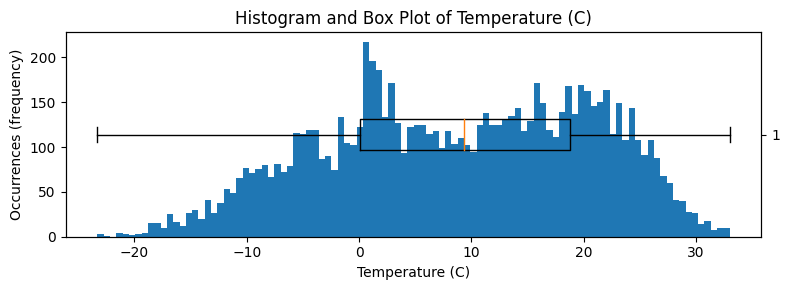

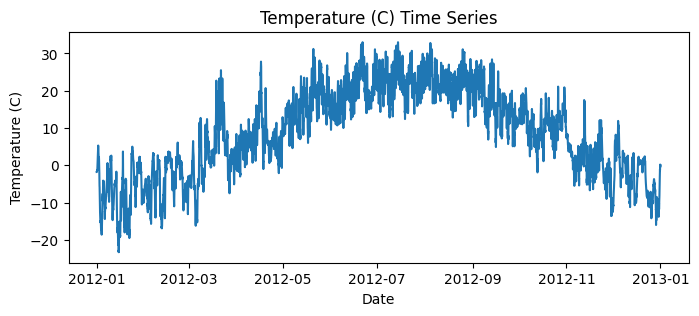

In [12]:
column = "temp_c"
y_label = "Temperature (C)"
visualisations.plot_hist_and_boxplot(df, column=column, y_label=y_label)
visualisations.plot_timeseries(df, column=column, y_label=y_label)

There is a seasonal pattern in the Temperature, where the Summer months reach higher temperatures (June, July, August, September). 
Winter months have lower temperature (January, February, December)

QUESTION: Do we have a daily seasonality? (e.g. higher temperature closer to noon and lower temperature during the night?)

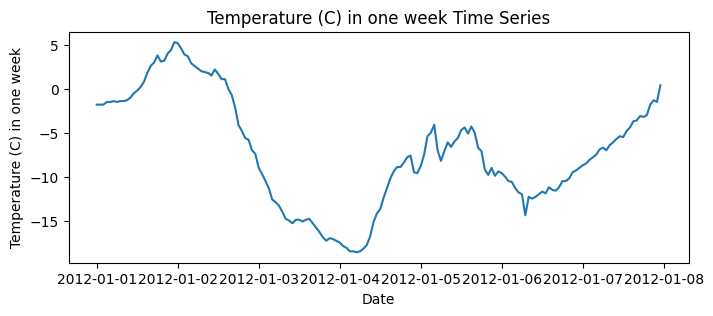

In [13]:
visualisations.plot_timeseries(
    df.head(24 * 7), column=column, y_label="Temperature (C) in one week"
)

ANS: it looks like it is not evident in the first sample of the data.

### Dew Point temperature

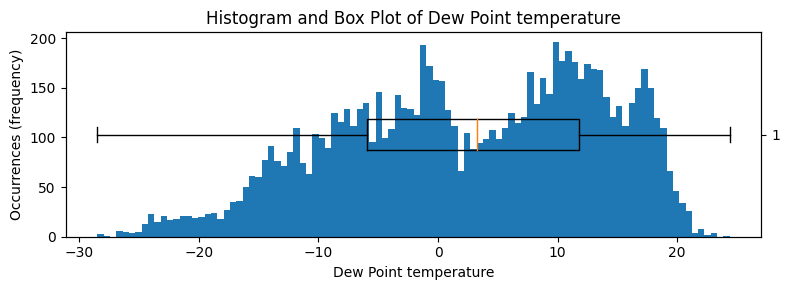

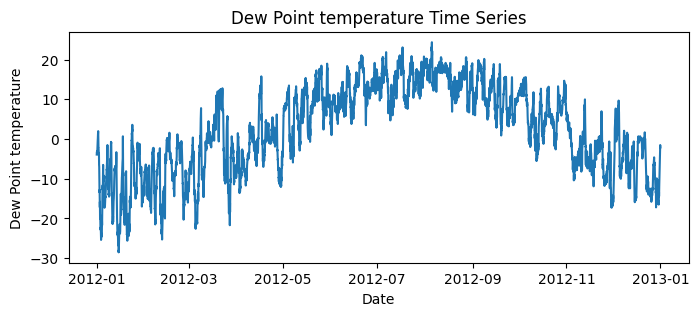

In [14]:
column = "dew_point_temp_c"
y_label = "Dew Point temperature"
visualisations.plot_hist_and_boxplot(df, column=column, y_label=y_label)
visualisations.plot_timeseries(df, column=column, y_label=y_label)

### Real Humidity %

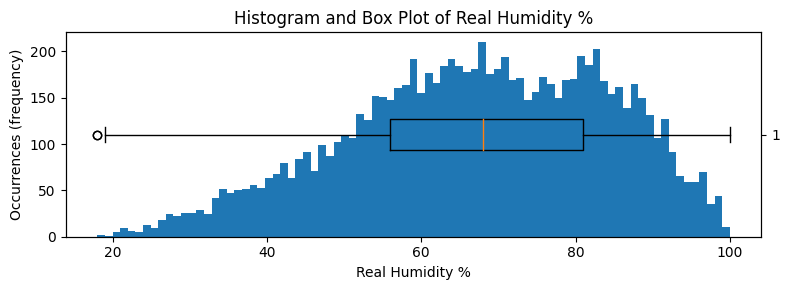

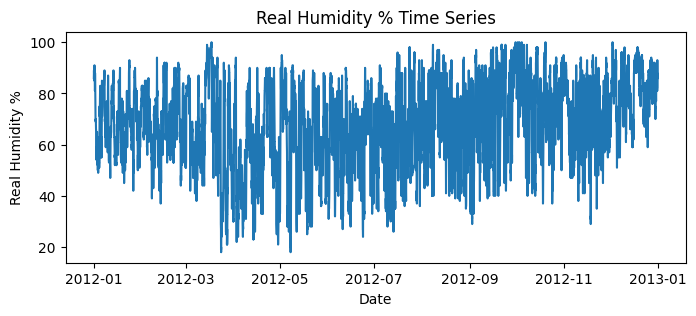

In [15]:
column = "real_hum_pct"
y_label = "Real Humidity %"
visualisations.plot_hist_and_boxplot(df, column=column, y_label=y_label)
visualisations.plot_timeseries(df, column=column, y_label=y_label)

### Wind Speed (km/h)

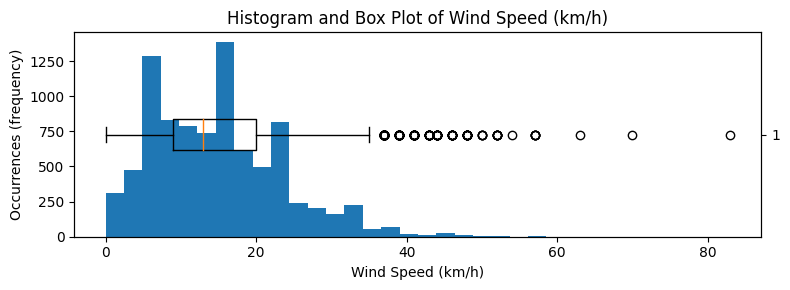

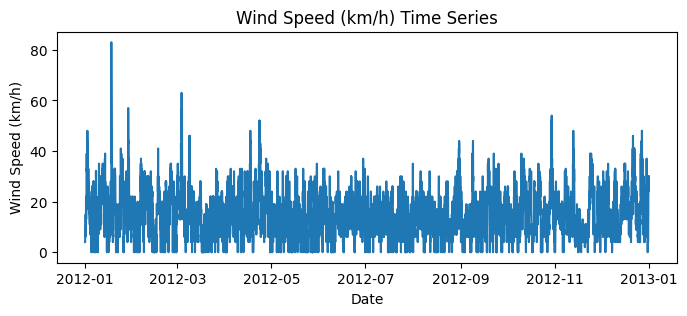

In [16]:
column = "wind_speed_kmh"
y_label = "Wind Speed (km/h)"
visualisations.plot_hist_and_boxplot(df, column=column, y_label=y_label)
visualisations.plot_timeseries(df, column=column, y_label=y_label)

### Visibility (km)

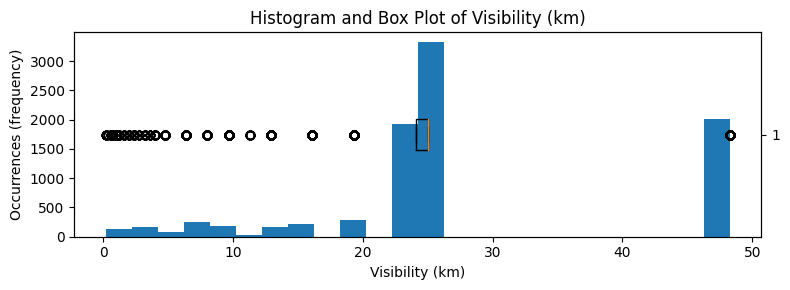

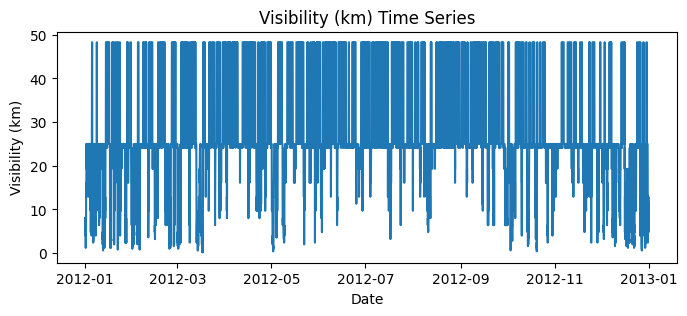

In [17]:
column = "visibility_km"
y_label = "Visibility (km)"
visualisations.plot_hist_and_boxplot(df, column=column, y_label=y_label)
visualisations.plot_timeseries(df, column=column, y_label=y_label)

QUESTION: Is the visibility affected by dailight and nigh time?

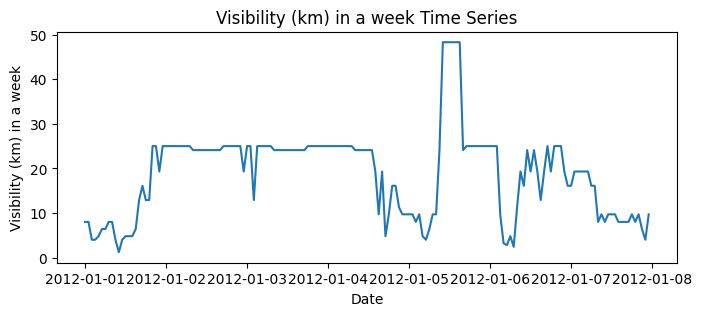

In [18]:
visualisations.plot_timeseries(df.head(24 * 7), column=column, y_label="Visibility (km) in a week")

ANS: It does not look like it 😕

### Pressure (kPa)

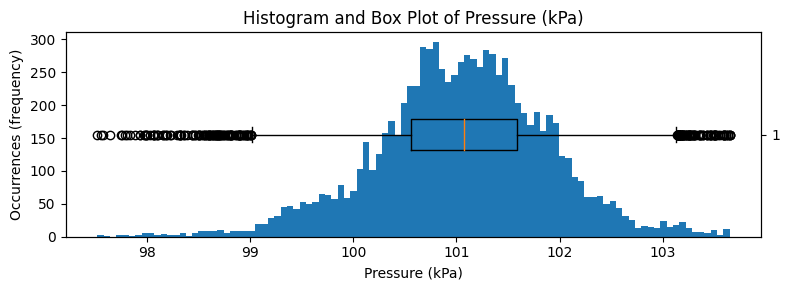

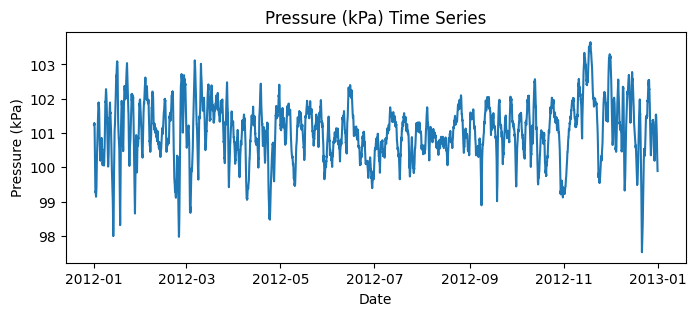

In [19]:
column = "press_kpa"
y_label = "Pressure (kPa)"
visualisations.plot_hist_and_boxplot(df, column=column, y_label=y_label)
visualisations.plot_timeseries(df, column=column, y_label=y_label)

OBSERVATION: It looks like the variability of the pressure is higher during colder months.

### Weather

In [20]:
df.weather.nunique()

50

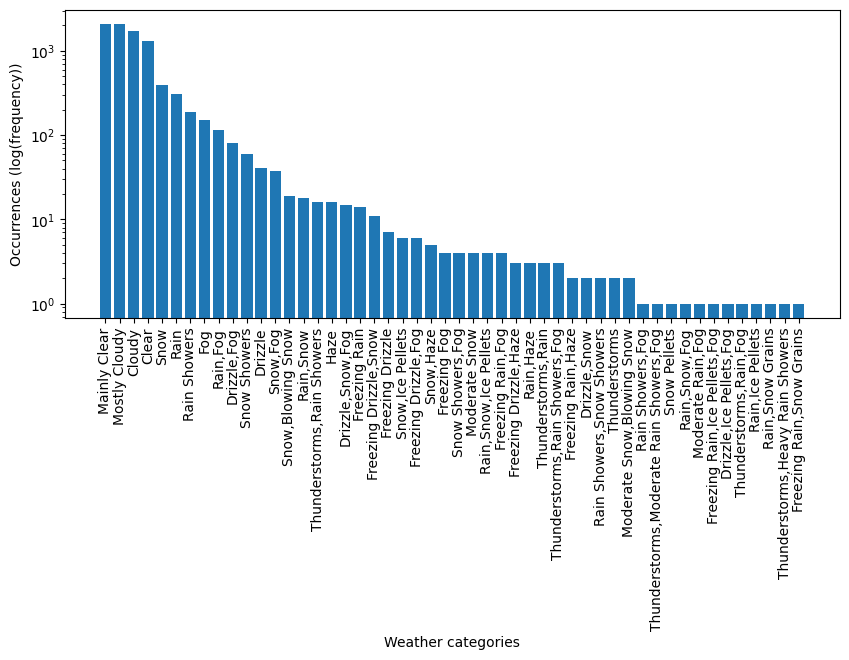

In [21]:
sr_weather_categories = df.weather.value_counts()

plt.figure(figsize=(10, 4))
plt.bar(sr_weather_categories.index, sr_weather_categories.values)
plt.xticks(rotation=90)
plt.yscale("log")
plt.ylabel("Occurrences (log(frequency))")
plt.xlabel("Weather categories")
plt.show()

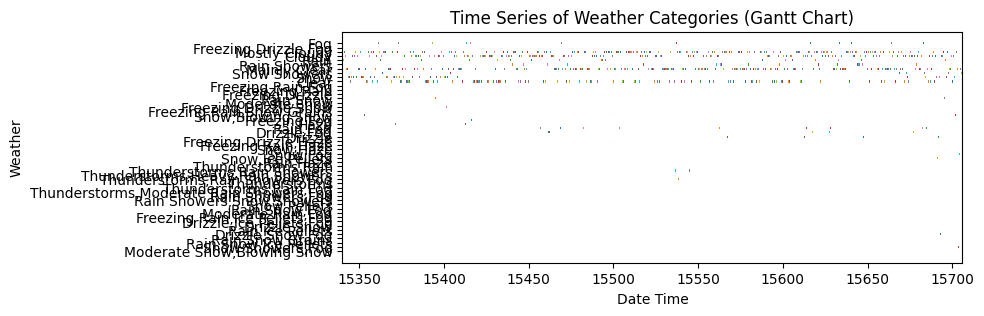

In [35]:
visualisations.plot_gantt_of_categories(df, category_column="weather", y_label="Weather")

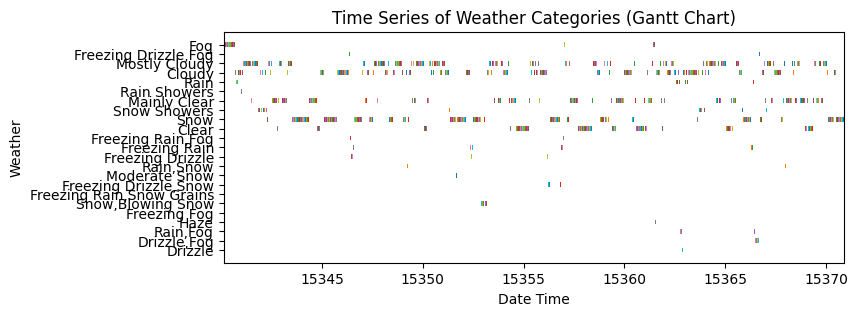

In [36]:
# January
visualisations.plot_gantt_of_categories(
    df[df.date_time < pd.to_datetime("2012-02-01")], category_column="weather", y_label="Weather"
)

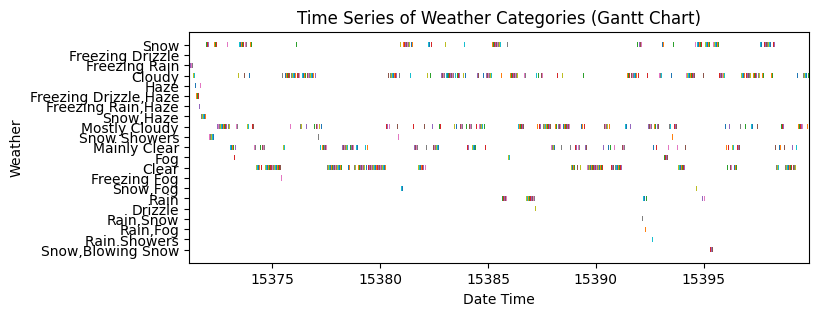

In [38]:
# February
visualisations.plot_gantt_of_categories(
    df[
        (df.date_time >= pd.to_datetime("2012-02-01"))
        & (df.date_time < pd.to_datetime("2012-03-01"))
    ],
    category_column="weather",
    y_label="Weather",
)

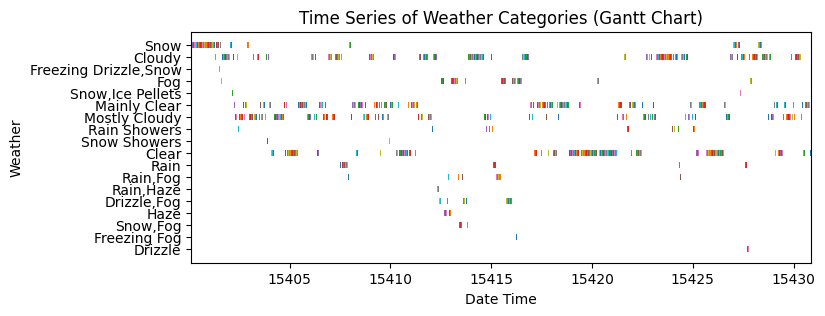

In [39]:
# March
visualisations.plot_gantt_of_categories(
    df[
        (df.date_time >= pd.to_datetime("2012-03-01"))
        & (df.date_time < pd.to_datetime("2012-04-01"))
    ],
    category_column="weather",
    y_label="Weather",
)